In [179]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
df=pd.read_csv('international_matches.csv')
df1=pd.read_csv('FIFA - 2022.csv')
df.head().T

,0,1,2,3,4
date,1993-08-08,1993-08-08,1993-08-08,1993-08-08,1993-08-08
home_team,Bolivia,Brazil,Ecuador,Guinea,Paraguay
away_team,Uruguay,Mexico,Venezuela,Sierra Leone,Argentina
home_team_continent,South America,South America,South America,Africa,South America
away_team_continent,South America,North America,South America,Africa,South America
home_team_fifa_rank,59,8,35,65,67
away_team_fifa_rank,22,14,94,86,5
home_team_total_fifa_points,0,0,0,0,0
away_team_total_fifa_points,0,0,0,0,0
home_team_score,3,1,5,1,1


In [180]:
df['tournament'].unique()

array(['FIFA World Cup qualification', 'Friendly',
       'African Cup of Nations qualification', 'Amílcar Cabral Cup',
       'CFU Caribbean Cup qualification',
       'United Arab Emirates Friendship Tournament',
       'Malta International Tournament', 'Lunar New Year Cup',
       'African Cup of Nations', 'CFU Caribbean Cup',
       'UEFA Euro qualification', 'Kirin Cup', 'FIFA World Cup',
       'Oceania Nations Cup qualification', 'Baltic Cup', 'Gulf Cup',
       'Simba Tournament', 'CECAFA Cup', 'Confederations Cup',
       'Dynasty Cup', "King's Cup", 'Nehru Cup', 'SAFF Cup',
       'Copa Paz del Chaco', 'Korea Cup', 'USA Cup', 'Copa América',
       'Merdeka Tournament', 'South Pacific Games', 'UNCAF Cup',
       'Oceania Nations Cup', 'Windward Islands Tournament', 'Gold Cup',
       'AFC Asian Cup qualification', 'UEFA Euro', 'AFF Championship',
       'AFC Asian Cup', 'King Hassan II Tournament',
       'Cyprus International Tournament', 'Dunhill Cup',
       'COSAFA Cup qu

In [181]:
#df['tournament'] = df['tournament'].replace({'Friendly': 0, 'other_value': 1})
df['tournament'] = df['tournament'].apply(lambda x: 0 if x=='Friendly' else 1)
df['tournament']
df.head().T

,0,1,2,3,4
date,1993-08-08,1993-08-08,1993-08-08,1993-08-08,1993-08-08
home_team,Bolivia,Brazil,Ecuador,Guinea,Paraguay
away_team,Uruguay,Mexico,Venezuela,Sierra Leone,Argentina
home_team_continent,South America,South America,South America,Africa,South America
away_team_continent,South America,North America,South America,Africa,South America
home_team_fifa_rank,59,8,35,65,67
away_team_fifa_rank,22,14,94,86,5
home_team_total_fifa_points,0,0,0,0,0
away_team_total_fifa_points,0,0,0,0,0
home_team_score,3,1,5,1,1


# Describing the data

In [115]:
#df.head().T
df.describe().T

,count,mean,std,min,25%,50%,75%,max
home_team_fifa_rank,23921.0,77.854688,52.355225,1.0,33.0,71.0,115.0,211.0
away_team_fifa_rank,23921.0,80.797375,53.232902,1.0,36.0,73.0,119.0,211.0
home_team_total_fifa_points,23921.0,323.401488,500.825725,0.0,0.0,0.0,547.0,2164.0
away_team_total_fifa_points,23921.0,315.453576,490.944273,0.0,0.0,0.0,523.0,2164.0
home_team_score,23921.0,1.609214,1.630127,0.0,0.0,1.0,2.0,31.0
away_team_score,23921.0,1.068266,1.263944,0.0,0.0,1.0,2.0,21.0
home_team_goalkeeper_score,8379.0,74.963838,8.212242,47.0,70.0,75.0,81.0,97.0
away_team_goalkeeper_score,8095.0,74.212477,8.225919,47.0,69.0,74.0,80.0,97.0
home_team_mean_defense_score,7787.0,74.903249,6.003114,52.8,71.0,75.2,78.8,91.8
home_team_mean_offense_score,8510.0,75.818743,6.268416,53.3,71.7,75.7,80.0,93.0


1. Fifa countries

In [116]:
coll= df[['home_team']]
coll=df[['home_team']].rename(columns={'home_team':'team'})
ection=df[['away_team']]
ection=df[['away_team']].rename(columns={'away_team':'team'})

collection=coll.append(ection)
collection=collection[['team']].drop_duplicates()
collection=collection['team'].to_list()

wc_2022=df1['Team'].tolist()
print(wc_2022)

['Argentina', 'France', 'Croatia', 'Morocco', 'England', 'Netherlands', 'Portugal', 'Brazil', 'Japan', 'Senegal', 'Australia', 'Switzerland', 'USA', 'Spain', 'Poland', 'South Korea', 'Germany', 'Ecuador', 'Cameroon', 'Uruguay', 'Tunisia', 'Mexico', 'Belgium', 'Ghana', 'Saudi Arabia', 'Iran', 'Costa Rica', 'Denmark', 'Serbia', 'Wales', 'Canada', 'Qatar']


C:\Users\ankur\AppData\Local\Temp\ipykernel_36356\1039472986.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  collection=coll.append(ection)


2. Fifa rankings

In [117]:
home=df[['date','home_team','home_team_fifa_rank','home_team_total_fifa_points','home_team_score']]
away=df[['date','away_team','away_team_fifa_rank','away_team_total_fifa_points','away_team_score']]
home=home.rename(columns={'home_team':'team','home_team_fifa_rank':'rank','home_team_total_fifa_points':'total fifa points','home_team_score':'team_score'})
away=away.rename(columns={'away_team':'team','away_team_fifa_rank':'rank','away_team_total_fifa_points':'total fifa points','away_team_score':'team_score'})
fifarank=home.append(away)

fifarank=fifarank.sort_values(['team','date'],ascending=[True,False])
fifarank['row_number']=fifarank.groupby('team').cumcount()+1
fifatop=fifarank[fifarank['row_number']==1].drop('row_number',axis=1).nsmallest(10,'rank')
fifatop[['team','rank','total fifa points']]

C:\Users\ankur\AppData\Local\Temp\ipykernel_36356\1032665697.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fifarank=home.append(away)


,team,rank,total fifa points
23760,Brazil,1,1832
23909,Belgium,2,1827
23885,France,3,1789
23741,Argentina,4,1765
23906,England,5,1761
23907,Italy,6,1723
23866,Spain,7,1709
23867,Portugal,8,1674
23903,Mexico,9,1658
23908,Netherlands,10,1658


3. Advantage over home matches

In [118]:
hometeam=df[['country','home_team_score','away_team_score']]
#home_team['home_team_score']>home_team['away_team_score']
home_wins=hometeam.loc[hometeam['home_team_score']>hometeam['away_team_score']]

home_wins=home_wins.rename(columns={'home_team_score':'goals_scored','away_team_score':'goals_conceded'})
home_wins

home_loss=hometeam.loc[hometeam['home_team_score']<hometeam['away_team_score']]
home_loss=home_loss.rename(columns={'home_team_score':'goals_scored','away_team_score':'goals_conceded'})
home_loss

home_advantage=home_wins.append(home_loss)
home_advantage

x=home_advantage.mean()
print(x)

goals_scored      1.854837
goals_conceded    1.144394
dtype: float64


C:\Users\ankur\AppData\Local\Temp\ipykernel_36356\2781291216.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  home_advantage=home_wins.append(home_loss)
C:\Users\ankur\AppData\Local\Temp\ipykernel_36356\2781291216.py:15: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  x=home_advantage.mean()


4. Piechart of homeadvantage

C:\Users\ankur\AppData\Local\Temp\ipykernel_36356\1442176457.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  x = home_advantage.mean()


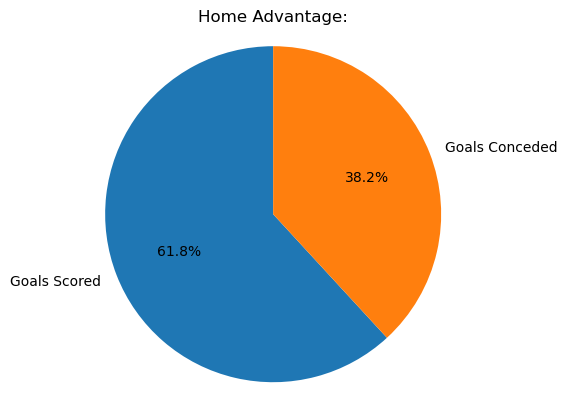

In [119]:
# Calculate the mean goals scored and conceded
x = home_advantage.mean()
labels = ['Goals Scored', 'Goals Conceded']
sizes = [x['goals_scored'], x['goals_conceded']]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title("Home Advantage:")
plt.show()

# Analysing the data (logical factor based)

1. Most wins

In [128]:
hometeam=df[['date','home_team','home_team_score','away_team_score']]

In [129]:
home_wins=hometeam.loc[hometeam['home_team_score']>hometeam['away_team_score']]

hometeam_wins=home_wins[['date','home_team','home_team_score','away_team_score']].rename(columns={'home_team':'team','home_team_score':'Home_team_win','away_team_score':'away_team_win'})
awayteam_wins=home_loss[['date','home_team','home_team_score','away_team_score']].rename(columns={'home_team':'team','home_team_score':'Home_team_win','away_team_score':'away_team_win'})

Team_streak=hometeam_wins.append(awayteam_wins)
Team_streak

Team_streak['team'].value_counts().nlargest(10)

C:\Users\ankur\AppData\Local\Temp\ipykernel_36356\1612302917.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Team_streak=hometeam_wins.append(awayteam_wins)


USA                     253
Mexico                  243
Saudi Arabia            219
Japan                   211
Brazil                  195
Egypt                   195
Qatar                   187
Korea Republic          186
United Arab Emirates    182
Oman                    179
Name: team, dtype: int64

2. Most loss

In [130]:
home_loss=hometeam.loc[hometeam['home_team_score']<hometeam['away_team_score']]

hometeam_loss=home_loss[['date','home_team','home_team_score','away_team_score']].rename(columns={'home_team':'team','home_team_score':'Home_team_win','away_team_score':'away_team_win'})
awayteam_loss=home_loss[['date','home_team','home_team_score','away_team_score']].rename(columns={'home_team':'team','home_team_score':'Home_team_win','away_team_score':'away_team_win'})

Team_streak=hometeam_loss.append(awayteam_loss)
Team_streak

Team_streak['team'].value_counts().nlargest(10)

C:\Users\ankur\AppData\Local\Temp\ipykernel_36356\3759103905.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Team_streak=hometeam_loss.append(awayteam_loss)


Malta                   190
Luxembourg              190
San Marino              166
Estonia                 156
Andorra                 146
Liechtenstein           146
Latvia                  128
Qatar                   128
El Salvador             128
United Arab Emirates    126
Name: team, dtype: int64

3(a). Winning % when higher rank team faces lower rank team 

   (rank based analysation)

In [ ]:
def victory(team1,team2,team1_rank,team2_rank,team1_score,team2_score):
    if team1_score > team2_score:
        winner = team1
    elif team1_score == team2_score:
        winner = 'Drawn'
    else:
        winner = team2
    return winner 

#winner counts
df['winner']=df.apply(lambda x: victory(x['home_team'],x['away_team'],x['home_team_fifa_rank'],x['away_team_fifa_rank'],x['home_team_score'],x['away_team_score']),axis=1)


In [ ]:
def rank(home,away,rank_home,rank_away):
    if rank_home<rank_away:
        return home
    else:
        return away  

#better rank counts    
df['better_rank']=df.apply(lambda x:rank(x['home_team'],x['away_team'],x['home_team_fifa_rank'],x['away_team_fifa_rank']),axis=1)
    

In [ ]:
def result_rank(winner,better_rank):
    if winner =='Drawn':
        return winner
    if winner == better_rank:
        return 'Higher rank team'
    else:
        return 'Lower rank team'

#counts of the result better rank & winner    
df['result_rank']=df.apply(lambda x: result_rank(x['winner'],x['better_rank']),axis=1)    

3(b). Countplot for result rank

In [ ]:
plt.figure(figsize=(10,5))
total=float(len(df))
ax=sns.countplot(x='result_rank',data=df)
for p in ax.patches:
    percentage='{:.1f}%'.format(100*p.get_height()/total)
    width=p.get_width()
    height=p.get_height()
    x,y=p.get_xy()
    ax.annotate(percentage,(x+width/2,y+height*1.02),ha='center')
plt.show    

4(a). winning % when heigher offense rank team faces lower offense rank team

   (rank based analysis)

In [ ]:
#attack score home team
df_rank_attack=df[df['home_team_mean_offense_score'].notnull()]
#attack score away team
df_rank_attack=df[df['away_team_mean_offense_score'].notnull()]

def rank_attack(home,away,rank_home,rank_away):
    if rank_home>rank_away:
        return home
    else:
        return away

#storing teams with better attack score    
df_rank_attack['better_attack']=df.apply(lambda x:rank_attack(x['home_team'],x['away_team'],x['home_team_mean_offense_score'],x['away_team_mean_offense_score']),axis=1)
#storing teams with better result only attack based
df_rank_attack['result_attack']=df_rank_attack.apply(lambda x:result_rank(x['winner'],x['better_attack']),axis=1)    

4(b). countplot for attack rank 

   (based on attack conclusion (i.e.attack score + attack result )

In [ ]:
plt.figure(figsize=(15,5))
total=float(len(df_rank_attack))
ax=sns.countplot(x='result_attack',data=df_rank_attack)
for p in ax.patches:
    percentage='{:.1f}%'.format(100*p.get_height()/total)
    width=p.get_width()
    height=p.get_height()
    x,y=p.get_xy()
    ax.annotate(percentage,(x+width/2,y+height*1.02),ha='center')
plt.show    

5(a). Result whether strong attack team score more & team with strong defence cociede less

In [ ]:
#calculating offence score of all teams
#(priority based on offence score)
offense_score=[]

for x in wc_2022:
    of_score=np.round(df[df['home_team']==x]['home_team_mean_offense_score'].mean()+df[df['away_team']==x]['away_team_mean_offense_score'].mean()/2)
    offense_score.append(of_score)
offense_score=pd.DataFrame({'Team':wc_2022,'Offense Score':offense_score}).sort_values('Offense Score',ascending=False).reset_index(drop=True)
offense_score.index +=1
offense_score


#calculating goal difference(GD), goal ratio(GR) of all teams
#(prioriy based on the overall GD,GR scores)
goals_scored_home, goals_scored_away = [], []
goals_conceded_home, goals_conceded_away = [], []
total_goals_scored, total_goals_conceded = [], []

for team in wc_2022:
    gch = df[df['home_team'] == team]['away_team_score'].sum()
    gsh = df[df['home_team'] == team]['home_team_score'].sum()
    gca = df[df['away_team'] == team]['home_team_score'].sum()
    gsa = df[df['away_team'] == team]['away_team_score'].sum()

    tgc = gch + gca
    tgs = gsh + gsa

    goals_conceded_home.append(gch)
    goals_scored_home.append(gsh)
    goals_conceded_away.append(gca)
    goals_scored_away.append(gsa)

    total_goals_scored.append(tgs)
    total_goals_conceded.append(tgc)

goals = pd.DataFrame({
    'Team': wc_2022,
    'Scored goals home': goals_scored_home,
    'Scored goals away': goals_scored_away,
    'Conceded goals home': goals_conceded_home,
    'Conceded goals away': goals_conceded_away,
    'Total scored goals': total_goals_scored,
    'Total conceded goals': total_goals_conceded
})

goals['Goal difference'] = goals['Total scored goals'] - goals['Total conceded goals']
goals['Goal ratio'] = goals['Total scored goals'] / goals['Total conceded goals']

goals = goals.sort_values('Goal difference', ascending=False).reset_index(drop=True)
goals.index += 1

goals


#comparing both offense score vs GD,GR and storing based on priority of both scores
#it is comparing values if a higher offence team scores more goals against other teams
offense_players_vs_goals_scored = offense_score.merge(goals, on='Team')[['Team', 'Offense Score', 'Total scored goals']]
offense_players_vs_goals_scored['Total scored goals/offense score'] = offense_players_vs_goals_scored['Total scored goals'] / offense_players_vs_goals_scored['Offense Score']
offense_players_vs_goals_scored = offense_players_vs_goals_scored.sort_values('Total scored goals/offense score')
offense_players_vs_goals_scored.index += 1
offense_players_vs_goals_scored=offense_players_vs_goals_scored.sort_index(ascending=True)
offense_players_vs_goals_scored

5(b). plotting 

In [ ]:
plt.figure(figsize=(11,5),dpi=90)
ax=sns.barplot(data=offense_players_vs_goals_scored[:10],x='Team',y='Total scored goals/offense score')
ax.bar_label(ax.containers[0])
plt.xlabel('Teams')
plt.ylabel('goals/offence ratio')
plt.title('top 10 best team goals/offence ratio')

6(a). better team win percentage in home team, away team

In [ ]:
home_team_better_rank=df[(df['home_team_fifa_rank']<df['away_team_fifa_rank'])]['home_team_result'].value_counts()
home_team_better_rank

away_team_better_rank=df[(df['home_team_fifa_rank']>df['away_team_fifa_rank'])]['home_team_result'].value_counts()
away_team_better_rank

# Calculate win percentages
away_team_better_rank_wins_percent = np.round(100 * away_team_better_rank['Win'] / away_team_better_rank.sum())
home_team_better_rank_wins_percent = np.round(100 * home_team_better_rank['Win'] / home_team_better_rank.sum())
total_team_better_rank_win_percent = np.round(100 * (away_team_better_rank['Win'] + home_team_better_rank['Win']) / (away_team_better_rank.sum() + home_team_better_rank.sum()))

data = {'win percentage': [home_team_better_rank_wins_percent, away_team_better_rank_wins_percent, total_team_better_rank_win_percent]}
better_team_win_percent = pd.DataFrame(data, index=['home', 'away', 'total'])
better_team_win_percent

6(b). plotting 

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(11, 3), dpi=90)
ax = sns.barplot(data=better_team_win_percent, x=better_team_win_percent.index, y='win percentage')  # Correct column name
sns.barplot(data=better_team_win_percent, x=better_team_win_percent.index, y='win percentage')  # Correct column name
ax.bar_label(ax.containers[0], label_type='edge')  # Label the bars on the top edge
plt.ylabel('Win Percentage')
plt.title('Better Team Win Percentage')
plt.show()

# Analysing the data (statistical factor based)

1. teams with best defense, midfield, offense and gk

In [ ]:
ranks = []
for x in wc_2022:
    rank_df = df[(df['home_team'] == x) | (df['away_team'] == x)].sort_values(['date', 'home_team_fifa_rank', 'away_team_fifa_rank'])
    if (rank_df['home_team'] == x).any():
        rank = rank_df.loc[rank_df['home_team'] == x, 'home_team_fifa_rank'].values[0]
    elif (rank_df['away_team'] == x).any():
        rank = rank_df.loc[rank_df['away_team'] == x, 'away_team_fifa_rank'].values[0]
    else:
        rank = None
    ranks.append(rank)

team_ranks = pd.DataFrame({'Team': wc_2022, 'Rank': ranks}).sort_values('Rank').reset_index(drop=True)
team_ranks['Rank'] = team_ranks.index + 1  # Assign consecutive integer ranks
team_ranks


1(a). teams with best gk

In [ ]:
goalkeeper_scores = []

for x in wc_2022:
    avg_gk_score = (df[df['away_team'] == x]['away_team_goalkeeper_score'].mean() + df[df['home_team'] == x]['home_team_goalkeeper_score'].mean()) / 2
    gk_score = np.round(avg_gk_score)
    goalkeeper_scores.append(gk_score)
    
goalkeeper_scores = pd.DataFrame({'Team': wc_2022, 'GK score': goalkeeper_scores}).sort_values('GK score', ascending=False).reset_index(drop=True)
goalkeeper_scores.index += 1  # Assign consecutive integer ranks
goalkeeper_scores

plotting gk based

In [ ]:
plt.figure(figsize=(11, 7), dpi=90)
ax = sns.barplot(data=goalkeeper_scores[:10], x='Team', y='GK score')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 9), 
                textcoords='offset points')

plt.xlabel('Team')
plt.ylabel('Score')
plt.title('Top 10 strongest Goalkeeping')
plt.tight_layout()
plt.show()


1(b). teams with best defense 

In [ ]:
defense_scores = []

for x in wc_2022:
    df_score = (df[df['home_team'] == x]['home_team_mean_defense_score'].mean() + df[df['away_team'] == x]['away_team_mean_defense_score'].mean()) / 2
    df_score = np.round(df_score)
    defense_scores.append(df_score)
    
defense_scores_df = pd.DataFrame({'Team': wc_2022, 'Defense Score': defense_scores}).sort_values('Defense Score', ascending=False).reset_index(drop=True)
defense_scores_df.index += 1  # Assign consecutive integer ranks
defense_scores_df

plotting defense

In [ ]:
plt.figure(figsize=(11, 7), dpi=90)
ax = sns.barplot(data=defense_scores_df[:10], x='Team', y='Defense Score')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 9), 
                textcoords='offset points')

plt.xlabel('Team')
plt.ylabel('Score')
plt.title('Top 10 Strongest Defense')
plt.tight_layout()
plt.show()

1(c). teams with best offense 

In [ ]:
attack_scores = []

for x in wc_2022:
    attack_score = (df[df['home_team'] == x]['home_team_mean_offense_score'].mean() + df[df['away_team'] == x]['away_team_mean_offense_score'].mean()) / 2
    attack_score = np.round(attack_score)
    attack_scores.append(attack_score)
    
attack_scores_df = pd.DataFrame({'Team': wc_2022, 'Attack Score': attack_scores}).sort_values('Attack Score', ascending=False).reset_index(drop=True)
attack_scores_df.index += 1  # Assign consecutive integer ranks
attack_scores_df

plotting offense

In [ ]:
plt.figure(figsize=(11, 7), dpi=90)
ax = sns.barplot(data=attack_scores_df[:10], x='Team', y='Attack Score')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 9), 
                textcoords='offset points')

plt.xlabel('Team')
plt.ylabel('Score')
plt.title('Top 10 Strongest Attack')
plt.tight_layout()
plt.show()

1(d). teams with best midfield

In [ ]:
midfield_scores = []

for x in wc_2022:
    midfield_score = (df[df['home_team'] == x]['home_team_mean_midfield_score'].mean() + df[df['away_team'] == x]['away_team_mean_midfield_score'].mean()) / 2
    midfield_score = np.round(midfield_score)
    midfield_scores.append(midfield_score)
    
midfield_scores_df = pd.DataFrame({'Team': wc_2022, 'Midfield Score': midfield_scores}).sort_values('Midfield Score', ascending=False).reset_index(drop=True)
midfield_scores_df.index += 1  # Assign consecutive integer ranks
midfield_scores_df

plotting midfield

In [ ]:
plt.figure(figsize=(11, 7), dpi=90)
ax = sns.barplot(data=midfield_scores_df[:10], x='Team', y='Midfield Score')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 9), 
                textcoords='offset points')

plt.xlabel('Team')
plt.ylabel('Score')
plt.title('Top 10 Strongest Midfield')  # Adjust the title for midfield
plt.tight_layout()
plt.show()

2. Win percentage

In [105]:
wc2022_teams = wc_2022

hwins, hdraws, hloses = [], [], []
awins, adraws, aloses = [], [], []

for team in wc2022_teams:
    home_win = df[(df["home_team"] == team) & (df["home_team_result"] == "Win")].shape[0]
    home_draw = df[(df["home_team"] == team) & (df["home_team_result"] == "Draw")].shape[0]
    home_lose = df[(df["home_team"] == team) & (df["home_team_result"] == "Lose")].shape[0]
    
    away_win = df[(df["away_team"] == team) & (df["home_team_result"] == "Lose")].shape[0]
    away_draw = df[(df["away_team"] == team) & (df["home_team_result"] == "Draw")].shape[0]
    away_lose = df[(df["away_team"] == team) & (df["home_team_result"] == "Win")].shape[0]
    
    hwins.append(home_win)
    hdraws.append(home_draw)
    hloses.append(home_lose)
    
    awins.append(away_win)
    adraws.append(away_draw)
    aloses.append(away_lose)
    
    wins = np.add(hwins, awins)
    draws = np.add(hdraws, adraws)
    loses = np.add(hloses, aloses)

total_matches = np.add(np.add(wins,draws),loses)

win_percentages = (wins / total_matches) * 100

team_win_percentage = pd.DataFrame({'Team': wc2022_teams, 'Win Percentage': win_percentages})
team_win_percentage = team_win_percentage.sort_values('Win Percentage', ascending=False).reset_index(drop=True)
team_win_percentage.index += 1

print(team_win_percentage) 

            Team  Win Percentage
1         Brazil       69.515012
2          Spain       69.491525
3         France       62.162162
4        Germany       61.538462
5    Netherlands       59.117647
6       Portugal       58.928571
7      Argentina       58.855586
8        England       58.682635
9        Croatia       53.750000
10         Japan       53.411765
11       Belgium       53.177258
12     Australia       52.768730
13        Mexico       52.611219
14       Morocco       52.321981
15           USA       52.155172
16       Denmark       50.967742
17  Saudi Arabia       50.530786
18       Tunisia       48.342541
19       Senegal       48.000000
20       Uruguay       46.246246
21   Switzerland       45.819398
22        Poland       45.664740
23      Cameroon       45.121951
24        Serbia       44.943820
25         Qatar       43.703704
26         Ghana       42.979943
27    Costa Rica       39.250000
28        Canada       39.148936
29       Ecuador       37.910448
30        

C:\Users\ankur\AppData\Local\Temp\ipykernel_36356\2985554959.py:29: RuntimeWarning: invalid value encountered in divide
  win_percentages = (wins / total_matches) * 100


# Predictor (statistical analysis)

In [175]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the data

# Calculate statistics for each team
teams = df['home_team'].unique()

team_stats = []

for team in teams:
    
    result = df[(df['home_team']==team) & ((df['tournament']== 1)|(df['tournament']== 0))]
    
    total_matches = len(df[(df['home_team'] == team) | (df['away_team'] == team)])
    total_wins = len(df[(df['home_team'] == team) & (df['home_team_result'] == 'Win')]) + len(df[(df['away_team'] == team) & (df['home_team_result'] == 'Lose')])
    total_draws = len(df[(df['home_team'] == team) & (df['home_team_result'] == 'Draw')]) + len(df[(df['away_team'] == team) & (df['home_team_result'] == 'Draw')])
    total_losses = total_matches - total_wins - total_draws
    
    home_wins = len(df[(df['home_team'] == team) & (df['home_team_result'] == 'Win')])
    home_draws = len(df[(df['home_team'] == team) & (df['home_team_result'] == 'Draw')])
    home_losses = len(df[(df['home_team'] == team) & (df['home_team_result'] == 'Lose')])
    
    away_wins = len(df[(df['away_team'] == team) & (df['home_team_result'] == 'Lose')])
    away_draws = len(df[(df['away_team'] == team) & (df['home_team_result'] == 'Draw')])
    away_losses = len(df[(df['away_team'] == team) & (df['home_team_result'] == 'Win')])
    
    win_percentage = (total_wins / total_matches) * 100 if total_matches > 0 else 0
    draw_percentage = (total_draws / total_matches) * 100 if total_matches > 0 else 0
    loss_percentage = (total_losses / total_matches) * 100 if total_matches > 0 else 0
    
    home_win_percentage = (home_wins / (home_wins + home_draws + home_losses)) * 100 if (home_wins + home_draws + home_losses) > 0 else 0
    home_draw_percentage = (home_draws / (home_wins + home_draws + home_losses)) * 100 if (home_wins + home_draws + home_losses) > 0 else 0
    home_loss_percentage = (home_losses / (home_wins + home_draws + home_losses)) * 100 if (home_wins + home_draws + home_losses) > 0 else 0
    
    away_win_percentage = (away_wins / (away_wins + away_draws + away_losses)) * 100 if (away_wins + away_draws + away_losses) > 0 else 0
    away_draw_percentage = (away_draws / (away_wins + away_draws + away_losses)) * 100 if (away_wins + away_draws + away_losses) > 0 else 0
    away_loss_percentage = (away_losses / (away_wins + away_draws + away_losses)) * 100 if (away_wins + away_draws + away_losses) > 0 else 0
    
    # Calculate average rank, rank difference, point difference, and won previous matches
    avg_rank = (df[df['home_team'] == team]['home_team_fifa_rank'].mean() + df[df['away_team'] == team]['away_team_fifa_rank'].mean()) / 2
    rank_diff = df[df['home_team'] == team]['home_team_fifa_rank'].mean() - df[df['away_team'] == team]['away_team_fifa_rank'].mean()
    point_diff = df[df['home_team'] == team]['home_team_total_fifa_points'].mean() - df[df['away_team'] == team]['away_team_total_fifa_points'].mean()
    won_previous_matches = len(df[(df['home_team'] == team) & (df['home_team_result'] == 'Win')]) + len(df[(df['away_team'] == team) & (df['home_team_result'] == 'Win')])
    
    team_stats.append([team, total_matches, total_wins, total_draws, total_losses, home_wins, home_draws, home_losses, away_wins, away_draws, away_losses, win_percentage, draw_percentage, loss_percentage, home_win_percentage, home_draw_percentage, home_loss_percentage, away_win_percentage, away_draw_percentage, away_loss_percentage, avg_rank, rank_diff, point_diff, won_previous_matches,result])

# Create DataFrame
columns = ['Team', 'Total', 'Win', 'Draw', 'Lose', 'Home Win', 'Home Draw', 'Home Lose', 'Away Win', 'Away Draw', 'Away Lose', 'Win %', 'Draw %', 'Lose %', 'Home Win %', 'Home Draw %', 'Home Loss %', 'Away Win %', 'Away Draw %', 'Away Loss %', 'avg_rank', 'rank_diff', 'point_diff', 'won_previous_matches','result']
team_stats_df = pd.DataFrame(team_stats, columns=columns)

# Display the DataFrame
# Filter the team_stats_df DataFrame
filtered_team_stats_df = team_stats_df

# Display the filtered DataFrame
filtered_team_stats_df

sorted_team_stats_df = filtered_team_stats_df.sort_values(by='Win %', ascending=False)

# Reset the index of the sorted DataFrame and add 1 to each index value
sorted_team_stats_df.reset_index(drop=True, inplace=True)
sorted_team_stats_df.index = sorted_team_stats_df.index + 1

# Display the sorted and indexed DataFrame
sorted_team_stats_df

,Team,Total,Win,Draw,Lose,Home Win,Home Draw,Home Lose,Away Win,Away Draw,...,Home Draw %,Home Loss %,Away Win %,Away Draw %,Away Loss %,avg_rank,rank_diff,point_diff,won_previous_matches,result
1,Brazil,433,301,76,56,181,31,21,120,45,...,13.304721,9.012876,60.000000,22.500000,17.500000,3.119614,0.679227,127.101738,216,"Empty DataFrame Columns: [date, home_team, awa..."
2,Spain,354,246,64,44,145,27,17,101,37,...,14.285714,8.994709,61.212121,22.424242,16.363636,5.421934,-0.113709,-35.715248,172,"Empty DataFrame Columns: [date, home_team, awa..."
3,France,370,230,83,57,145,44,32,85,39,...,19.909502,14.479638,57.046980,26.174497,16.778523,8.269140,-0.293935,23.564001,170,"Empty DataFrame Columns: [date, home_team, awa..."
4,Germany,390,240,82,68,139,44,36,101,38,...,20.091324,16.438356,59.064327,22.222222,18.713450,6.406994,1.094689,53.204278,171,"Empty DataFrame Columns: [date, home_team, awa..."
5,IR Iran,366,217,79,70,133,31,27,84,48,...,16.230366,14.136126,48.000000,27.428571,24.571429,45.127435,-2.705131,-1.019417,176,"Empty DataFrame Columns: [date, home_team, awa..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,Liechtenstein,213,15,26,172,9,16,73,6,10,...,16.326531,74.489796,5.217391,8.695652,86.086957,156.265484,-1.347294,-24.420053,108,"Empty DataFrame Columns: [date, home_team, awa..."
208,Andorra,189,11,22,156,10,13,74,1,9,...,13.402062,76.288660,1.086957,9.782609,89.130435,165.953216,-0.463133,46.546952,92,"Empty DataFrame Columns: [date, home_team, awa..."
209,Djibouti,78,4,5,69,4,4,27,0,1,...,11.428571,77.142857,0.000000,2.325581,97.674419,193.248505,-0.154153,38.782060,46,"Empty DataFrame Columns: [date, home_team, awa..."
210,Anguilla,41,2,5,34,1,2,10,1,3,...,15.384615,76.923077,3.571429,10.714286,85.714286,203.222527,2.016484,25.695055,25,"Empty DataFrame Columns: [date, home_team, awa..."


plotting 

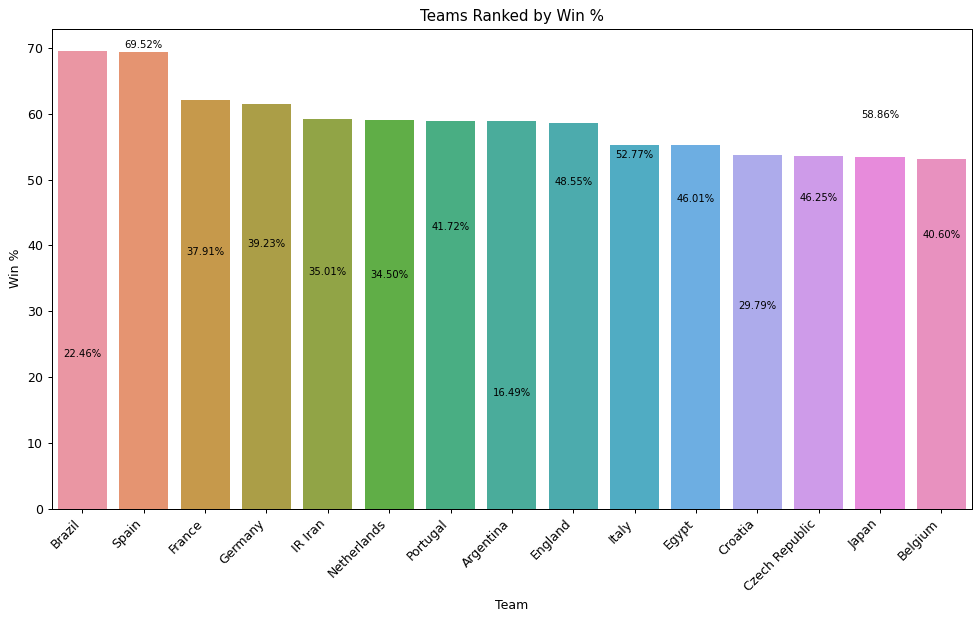

In [184]:
# Sort the DataFrame by "Win %" column in descending order
sorted_team_stats = filtered_team_stats_df.sort_values(by='Win %', ascending=False)

# Create the bar plot
plt.figure(figsize=(11, 7), dpi=90)
ax = sns.barplot(data=sorted_team_stats[:15], x='Team', y='Win %')
plt.xlabel("Team")
plt.ylabel('Win %')
plt.title('Teams Ranked by Win %')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility

# Annotate all the bars with their corresponding percentage values
for index, row in sorted_team_stats.iterrows():
    ax.annotate(f'{row["Win %"]:.2f}%', 
                xy=(index, row["Win %"]), 
                xytext=(0, 3), 
                textcoords='offset points', 
                ha='center', 
                fontsize=8, 
                color='black')

plt.tight_layout()
plt.show()